In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

%matplotlib inline 

In [160]:
test_id = pd.read_csv("test_identity.csv")
train_id = pd.read_csv("train_identity.csv")
test_tr = pd.read_csv("test_transaction.csv")
train_tr = pd.read_csv("train_transaction.csv") 

In [161]:
print(train_id.shape)
print(train_tr.shape) 

(144233, 41)
(590540, 394)


## Preprocessing & Data Cleaning

In [162]:
train = pd.merge(train_tr, train_id, on='TransactionID', how='left')
test = pd.merge(test_tr, test_id, on='TransactionID', how='left') 

In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [164]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 506690
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(3), object(31)
memory usage: 1.6+ GB


In [165]:
def differentcolumns(traincols, testcols):
     for i in traincols:
             if i not in testcols:
                     print(i)
differentcolumns(train.columns, test.columns) 

isFraud
id_01
id_02
id_03
id_04
id_05
id_06
id_07
id_08
id_09
id_10
id_11
id_12
id_13
id_14
id_15
id_16
id_17
id_18
id_19
id_20
id_21
id_22
id_23
id_24
id_25
id_26
id_27
id_28
id_29
id_30
id_31
id_32
id_33
id_34
id_35
id_36
id_37
id_38


In [166]:
test = test.rename(columns={"id-01": "id_01", "id-02": "id_02", "id-03": "id_03",
 "id-06": "id_06", "id-05": "id_05", "id-04": "id_04",
 "id-07": "id_07", "id-08": "id_08", "id-09": "id_09",
 "id-10": "id_10", "id-11": "id_11", "id-12": "id_12",
 "id-15": "id_15", "id-14": "id_14", "id-13": "id_13",
 "id-16": "id_16", "id-17": "id_17", "id-18": "id_18",
 "id-21": "id_21", "id-20": "id_20", "id-19": "id_19",
 "id-22": "id_22", "id-23": "id_23", "id-24": "id_24",
 "id-27": "id_27", "id-26": "id_26", "id-25": "id_25",
 "id-28": "id_28", "id-29": "id_29", "id-30": "id_30",
 "id-31": "id_31", "id-32": "id_32", "id-33": "id_33",
 "id-34": "id_34", "id-35": "id_35", "id-36": "id_36",
 "id-37": "id_37", "id-38": "id_38"})
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,vis

In [167]:
def nullvalues(data):
        total = data.isnull().sum().sort_values(ascending=False)
        percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
        missing_data= pd.concat([total, percent], axis=1, keys=['total', 'percent'])
        return missing_data


In [168]:
missing_data_train = nullvalues(train)
missing_data_train.head(350).T

,id_24,id_25,id_07,id_08,id_21,id_26,id_22,id_23,id_27,dist2,D7,id_18,D13,D14,D12,id_04,id_03,D6,id_33,id_10,D8,D9,id_09,id_30,id_32,id_34,id_14,V149,V153,V156,V154,V155,V157,V158,V161,V163,V147,V148,V162,V146,V138,V139,V140,V141,V142,V166,V164,V160,V159,V143,V144,V145,V152,V151,V150,V165,V339,V322,V338,V337,V336,V335,V334,V333,V332,V331,V330,V329,V328,V327,V326,V325,V324,V323,DeviceInfo,id_13,id_16,V237,V230,V267,V266,V265,V264,V263,V262,V261,V260,V228,V258,V257,V229,V254,V269,V253,V252,V231,V232,V249,V248,V247,V246,V233,V244,V243,V242,V241,V240,V268,V226,V218,V278,V217,V236,V219,V223,V224,V235,V277,V275,V274,V273,V225,V276,id_05,id_06,R_emaildomain,id_20,id_19,id_17,V202,V207,V204,V203,V214,V211,V212,V213,V215,V216,V199,V168,V191,V206,V187,V182,V183,V178,V196,V177,V176,V167,V186,V181,V179,V190,V205,V192,V193,V173,V172,V174,V171,V175,V197,V180,V201,V184,V185,V188,V189,V194,V198,V195,V200,V170,V208,V209,V210,V169,id_31,DeviceType,id_02,id_11,id_28,id_29,id_38,id_35,id_36,id_37,id_15,V272,V271,V270,V239,V220,V221,V222,V234,V238,V259,V227,V245,V250,V251,V255,V256,id_12,id_01,dist1,M5,M7,M8,M9,D5,M4,D2,V5,V1,V2,V3,V4,V6,D11,V7,V8,V9,V10,V11,M3,M2,M1,D3,M6,V42,V52,V51,V50,V48,V47,V46,V45,V44,V43,V49,V41,V40,V39,V38,V37,V36,V35,D4,P_emaildomain,V76,V77,V78,V79,V83,V80,V81,V82,V90,V94,V93,V92,V91,V89,V88,V87,V86,V75,V85,V84,D15,V71,V53,V54,V55,V56,V57,V58,V59,V60,V62,V72,V63,V64,V65,V66,V67,V68,V69,V74,V70,V61,V73,V18,V14,V27,V30,V26,V25,V24,V23,V22,V21,V20,V19,V31,V17,V16,V15,V13,V29,V12,V32,V33,V34,V28,D10,addr2,addr1,card2,card5,card4,card6,card3,V314,V313,V283,D1,V282,V288,V289,V315,V296,V300,V301,V281,V95,V96,V106,V114,V113,V112,V111,V110,V109,V108,V107
total,585793.000000,585408.00000,585385.000000,585385.000000,585381.000000,585377.000000,585371.000000,585371.000000,585371.000000,552913.000000,551623.000000,545427.000000,528588.000000,528353.000000,525823.00000,524216.000000,524216.000000,517353.000000,517251.000000,515614.000000,515614.000000,515614.000000,515614.000000,512975.000000,512954.000000,512735.000000,510496.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508595.000000,508589.000000,508589.000000,508589.000000,508589.000000,508589.000000,508589.000000,508589.000000,508589.000000,508589.000000,508589.000000,508589.000000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,508189.00000,471874.000000,463220.000000,461200.00000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,453675.000000,453675.000000,453249.000000,451279.00000,451222.000000,451171.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450909.000000,450721.000000,450721.000000,450721.000000,450721.000000,450721.000000,450721.000000,450721.0000

In [169]:
# Test Data Missing Values
missing_data_test = nullvalues(test)
missing_data_test.head(350).T

,id_24,id_25,id_26,id_07,id_08,id_21,id_27,id_22,id_23,dist2,id_18,D7,id_04,id_03,D12,id_30,id_32,id_33,id_14,id_34,id_09,D9,id_10,D8,V153,V157,V154,V155,V156,V158,V148,V161,V162,V163,V149,V147,V146,V138,V139,V140,V141,V142,V166,V164,V160,V159,V143,V144,V145,V152,V165,V150,V151,V328,V327,V339,V338,V337,V336,V335,V334,V333,V332,V331,V330,V322,V323,V324,V325,V329,V326,DeviceInfo,D14,D13,D6,id_16,V257,V268,V277,V276,V275,V274,V273,V247,V248,V249,V269,V265,V267,V266,V246,V264,V263,V262,V261,V260,V252,V258,V278,V242,V244,V243,V217,V218,V219,V223,V224,V225,V226,V228,V229,V230,V231,V232,V233,V235,V236,V237,V240,V241,V254,V253,id_13,id_05,id_06,id_20,R_emaildomain,id_19,id_17,V189,V195,V188,V170,V169,V197,V175,V198,V200,V201,V210,V209,V174,V171,V208,V180,V185,V194,V184,id_31,V199,V206,V187,V205,V204,V203,V202,V190,V191,V186,V176,V192,V181,V167,V196,V168,V179,V178,V177,V172,V173,V193,V182,V183,V207,V212,V213,V214,V215,V216,V211,id_11,id_28,id_29,DeviceType,id_02,id_35,id_15,id_37,id_36,id_38,V255,V234,V256,V238,V239,V222,V245,V250,V251,V221,V220,V272,V271,V270,V259,V227,id_01,id_12,M5,dist1,M4,M7,M8,M9,D2,D5,D3,M3,M1,M2,V1,V2,V5,V6,V7,D11,V11,V10,V9,V3,V4,V8,M6,V40,V41,V42,V45,V44,V52,V51,V50,V49,V48,V47,V46,V43,V39,V38,V37,V36,V35,D4,P_emaildomain,addr1,addr2,V60,V69,V74,V73,V72,V71,V70,V67,V68,V66,V57,V64,V63,V62,V61,V65,V58,V56,V54,V53,V59,V55,V12,V29,V19,V21,V22,V13,V23,V20,V24,V25,V26,V27,V28,V30,V31,V32,V33,V34,V18,V17,V16,V15,V14,D10,V76,V75,V81,V77,V88,V94,V93,V92,V91,V90,V89,V87,V78,V86,V85,V84,V82,V80,V79,V83,D15,card2,D1,V301,V300,V296,V289,V288,V283,V282,V281,V314,V315,V313,C13,card5,card4,card6,card3,C2,C9,V292,V291,V290,C10,V286,V287,V294,V285
total,501951.000000,501652.000000,501644.000000,501632.000000,501632.000000,501632.000000,501629.00000,501629.00000,501629.00000,470255.00000,455816.000000,446558.000000,440210.000000,440210.000000,437437.000000,436032.000000,436020.000000,436020.000000,435334.000000,434516.000000,432353.000000,432353.000000,432353.000000,432353.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430636.000000,430636.000000,430636.000000,430636.000000,430636.000000,430636.000000,430636.000000,430636.000000,430636.000000,430636.000000,430636.000000,430260.000000,430260.000000,430260.000000,430260.000000,430260.000000,430260.000000,430260.000000,430260.000000,430260.000000,430260.000000,430260.000000,430260.000000,430260.000000,430260.000000,430260.000000,430260.000000,430260.000000,430260.000000,391634.000000,391497.000000,383307.000000,381908.00000,380944.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,379963.000000,376405.000000,371941.000000,371941.000000,371058.000000,370821.000000,370785.000000,370725.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370316.000000,370066.000000,369957.000000,369957.000000,369957.000000,369957.000000,369957.000000,369957.000000,369957.000000,369957.000000,369957.000000,369957.000000,369957.000000,369957.000000,369957.000000,369957.000000,369957.000000,369957.000000,369957.00000

In [170]:
# Get the columns that we have to drop
droppedcols = missing_data_train[missing_data_train['percent'] > .05].index
droppedcols 

Index(['id_24', 'id_25', 'id_07', 'id_08', 'id_21', 'id_26', 'id_22', 'id_23',
       'id_27', 'dist2',
       ...
       'V13', 'V29', 'V12', 'V32', 'V33', 'V34', 'V28', 'D10', 'addr2',
       'addr1'],
      dtype='object', length=322)

In [171]:
# Drop the columns
train.drop(droppedcols, axis=1, inplace=True)
test.drop(droppedcols, axis=1, inplace=True) 

In [172]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 112 entries, TransactionID to V321
dtypes: float64(105), int64(4), object(3)
memory usage: 509.1+ MB


In [173]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 506690
Columns: 111 entries, TransactionID to V321
dtypes: float64(105), int64(3), object(3)
memory usage: 433.0+ MB


In [174]:
print(train.shape)
print(test.shape) 

(590540, 112)
(506691, 111)


In [175]:
missing_data_train = nullvalues(train)
missing_data_train.head(200).T 

,card2,card5,card4,card6,card3,V283,V282,V300,V301,V289,V288,V281,D1,V313,V314,V315,V296,V133,V117,V118,V137,V136,V135,V134,V124,V132,V131,V130,V116,V128,V127,V126,V125,V119,V123,V122,V129,V111,V115,V114,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V120,V112,V113,V121,V321,V320,V302,V319,V318,V317,V316,V312,V279,V310,V309,V308,V307,V306,V305,V304,V303,V311,V299,V280,V297,V295,V294,V293,V292,V291,V290,V287,V286,V298,V285,V284,TransactionDT,card1,ProductCD,TransactionAmt,C2,isFraud,C1,C6,C3,C4,C5,C7,C8,C9,C10,C11,C12,C13,C14,TransactionID
total,8933.000000,4259.000000,1577.00000,1571.00000,1565.00000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.015127,0.007212,0.00267,0.00266,0.00265,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
missing_data_test= nullvalues(test)
missing_data_test.head(200).T 

,card2,V283,V314,V296,V300,V289,V313,V281,V315,V288,V282,D1,V301,C13,card5,card4,card6,card3,V280,V279,C1,C3,C2,V285,V320,C4,C5,C6,C7,C8,C9,C10,C11,C12,C14,V284,V321,V286,V302,V319,V318,V317,V316,V312,V311,V310,V309,V308,V307,V306,V304,V303,V305,V299,V293,V287,V290,V291,V298,V292,V294,V295,V297,card1,ProductCD,TransactionAmt,TransactionDT,V103,V95,V96,V97,V98,V99,V100,V101,V102,V125,V104,V130,V123,V124,V126,V127,V128,V129,V131,V105,V132,V133,V134,V135,V136,V137,V122,V121,V120,V119,V118,V117,V116,V115,V114,V113,V112,V111,V110,V109,V108,V107,V106,TransactionID
total,8654.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,4748.000000,4547.000000,3086.00000,3007.000000,3002.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.017079,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.009371,0.008974,0.00609,0.005935,0.005925,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
missing_data_train = nullvalues(train)
print(missing_data_train.head(100).T) 

               card2        card5       card4       card6       card3  \
total    8933.000000  4259.000000  1577.00000  1571.00000  1565.00000   
percent     0.015127     0.007212     0.00267     0.00266     0.00265   

                V283         V282         V300         V301         V289  \
total    1269.000000  1269.000000  1269.000000  1269.000000  1269.000000   
percent     0.002149     0.002149     0.002149     0.002149     0.002149   

                V288         V281           D1         V313         V314  \
total    1269.000000  1269.000000  1269.000000  1269.000000  1269.000000   
percent     0.002149     0.002149     0.002149     0.002149     0.002149   

                V315         V296        V133        V117        V118  \
total    1269.000000  1269.000000  314.000000  314.000000  314.000000   
percent     0.002149     0.002149    0.000532    0.000532    0.000532   

               V137        V136        V135        V134        V124  \
total    314.000000  314.000000

In [178]:
missing_data_test = nullvalues(test)
print(missing_data_test.head(100).T)

               card2         V283         V314         V296         V300  \
total    8654.000000  6031.000000  6031.000000  6031.000000  6031.000000   
percent     0.017079     0.011903     0.011903     0.011903     0.011903   

                V289         V313         V281         V315         V288  \
total    6031.000000  6031.000000  6031.000000  6031.000000  6031.000000   
percent     0.011903     0.011903     0.011903     0.011903     0.011903   

                V282           D1         V301          C13        card5  \
total    6031.000000  6031.000000  6031.000000  4748.000000  4547.000000   
percent     0.011903     0.011903     0.011903     0.009371     0.008974   

              card4        card6        card3      V280      V279        C1  \
total    3086.00000  3007.000000  3002.000000  3.000000  3.000000  3.000000   
percent     0.00609     0.005935     0.005925  0.000006  0.000006  0.000006   

               C3        C2      V285      V320        C4        C5        

In [179]:
differentcolumns(train.columns, test.columns)

isFraud


In [180]:
for i in train:
     if train[i].dtype == 'object':
             train[i] = train[i].fillna(train[i].mode()[0])

In [181]:
for i in test:
     if test[i].dtype == 'object':
             test[i] = test[i].fillna(test[i].mode()[0])

In [182]:
missing_data_train = nullvalues(train)
missing_data_train.head(100).T

,card2,card5,card3,V300,V289,V281,V282,V283,V301,V313,V288,V296,V314,V315,D1,V136,V137,V124,V120,V119,V135,V118,V132,V134,V133,V116,V131,V130,V129,V128,V127,V126,V125,V121,V117,V112,V115,V114,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V122,V113,V123,V321,V320,V302,V319,V318,V317,V316,V279,V311,V310,V309,V308,V307,V306,V305,V304,V303,V312,V299,V280,V297,V295,V294,V293,V292,V291,V290,V287,V286,V285,V298,V284,card6,card4,isFraud,card1,ProductCD,TransactionAmt,TransactionDT,C2,C1,C7
total,8933.000000,4259.000000,1565.00000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,12.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.015127,0.007212,0.00265,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.002149,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
missing_data_test = nullvalues(test)
missing_data_test.head(100).T

,card2,V283,V314,V296,V281,V301,V313,V282,V315,V289,V288,D1,V300,C13,card5,card3,V284,V280,V279,C1,V320,C2,C3,V286,C4,C5,C6,C7,C8,C9,C10,C11,C12,C14,V285,V321,V287,V302,V319,V318,V317,V316,V312,V311,V310,V309,V308,V307,V306,V290,V304,V303,V305,V299,V295,V291,V292,V294,V293,V297,V298,card1,V96,V101,V100,V99,V98,V97,V103,V95,ProductCD,card4,card6,TransactionDT,TransactionAmt,V102,V125,V104,V130,V123,V124,V126,V127,V128,V129,V131,V105,V132,V133,V134,V135,V136,V137,V122,V121,V120,V119,V118,V117,V116
total,8654.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,6031.000000,4748.000000,4547.000000,3002.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.017079,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.011903,0.009371,0.008974,0.005925,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
train_cols = train.columns

for i in train_cols:
     if (i.startswith("C") or (i.startswith("V"))) and train[i].isnull().sum() > 0:
             train[i] = train[i].fillna(train[i].mode()[0])

In [185]:
test_cols = test.columns

for i in test_cols:
     if (i.startswith("C") or (i.startswith("V"))) and test[i].isnull().sum() > 0:
             test[i] = test[i].fillna(test[i].mode()[0])

In [186]:
missing_data_train = nullvalues(train)
missing_data_train.head(120).T

,card2,card5,card3,D1,V321,V110,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V112,V111,V98,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V99,V96,V97,C4,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card4,card6,C1,C2,C3,C5,V320,C6,C7,C8,C9,C10,C11,C12,C13,C14,V95,V123,V124,V125,V307,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V308,V294,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V295,V293,V126,V279,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V280,V292,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,TransactionID
total,8933.000000,4259.000000,1565.00000,1269.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.015127,0.007212,0.00265,0.002149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
missing_data_test = nullvalues(test)
missing_data_test.head(120).T

,card2,D1,card5,card3,V321,V111,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V113,V112,V99,V114,V115,V116,V117,V118,V119,V120,V121,V122,V100,V96,V98,C5,TransactionDT,TransactionAmt,ProductCD,card1,card4,card6,C1,C2,C3,C4,C6,V97,C7,C8,C9,C10,C11,C12,C13,C14,V95,V124,V123,V125,V320,V307,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V308,V294,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V295,V293,V126,V279,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V280,V292,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,TransactionID
total,8654.000000,6031.000000,4547.000000,3002.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.017079,0.011903,0.008974,0.005925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
train['D1'] = train['D1'].fillna(train['D1'].mode()[0])
test['D1'] = test['D1'].fillna(test['D1'].mode()[0])

In [189]:
train['card3'] = train['card3'].fillna(train['card3'].mode()[0])
test['card3'] = test['card3'].fillna(test['card3'].mode()[0])

In [190]:
train['card2'] = train['card2'].fillna(train['card2'].mode()[0])
test['card2'] = test['card2'].fillna(test['card2'].mode()[0])

In [191]:
train['card5'] = train['card5'].fillna(train['card5'].mode()[0])
test['card5'] = test['card5'].fillna(test['card5'].mode()[0])

In [192]:
missing_data_train = nullvalues(train)
missing_data_train.head(120).T

,V321,V320,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V97,V96,V95,C2,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,C1,C3,D1,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,V123,V124,V125,V307,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V308,V294,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V295,V293,V126,V279,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V280,V292,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,TransactionID
total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
missing_data_test = nullvalues(test)
missing_data_test.head(120).T

,V321,V110,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V111,V97,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V98,V96,V124,C3,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,C1,C2,C4,V95,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,V123,V125,V320,V307,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V308,V294,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V295,V293,V126,V279,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V280,V292,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,TransactionID
total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis

<AxesSubplot:>

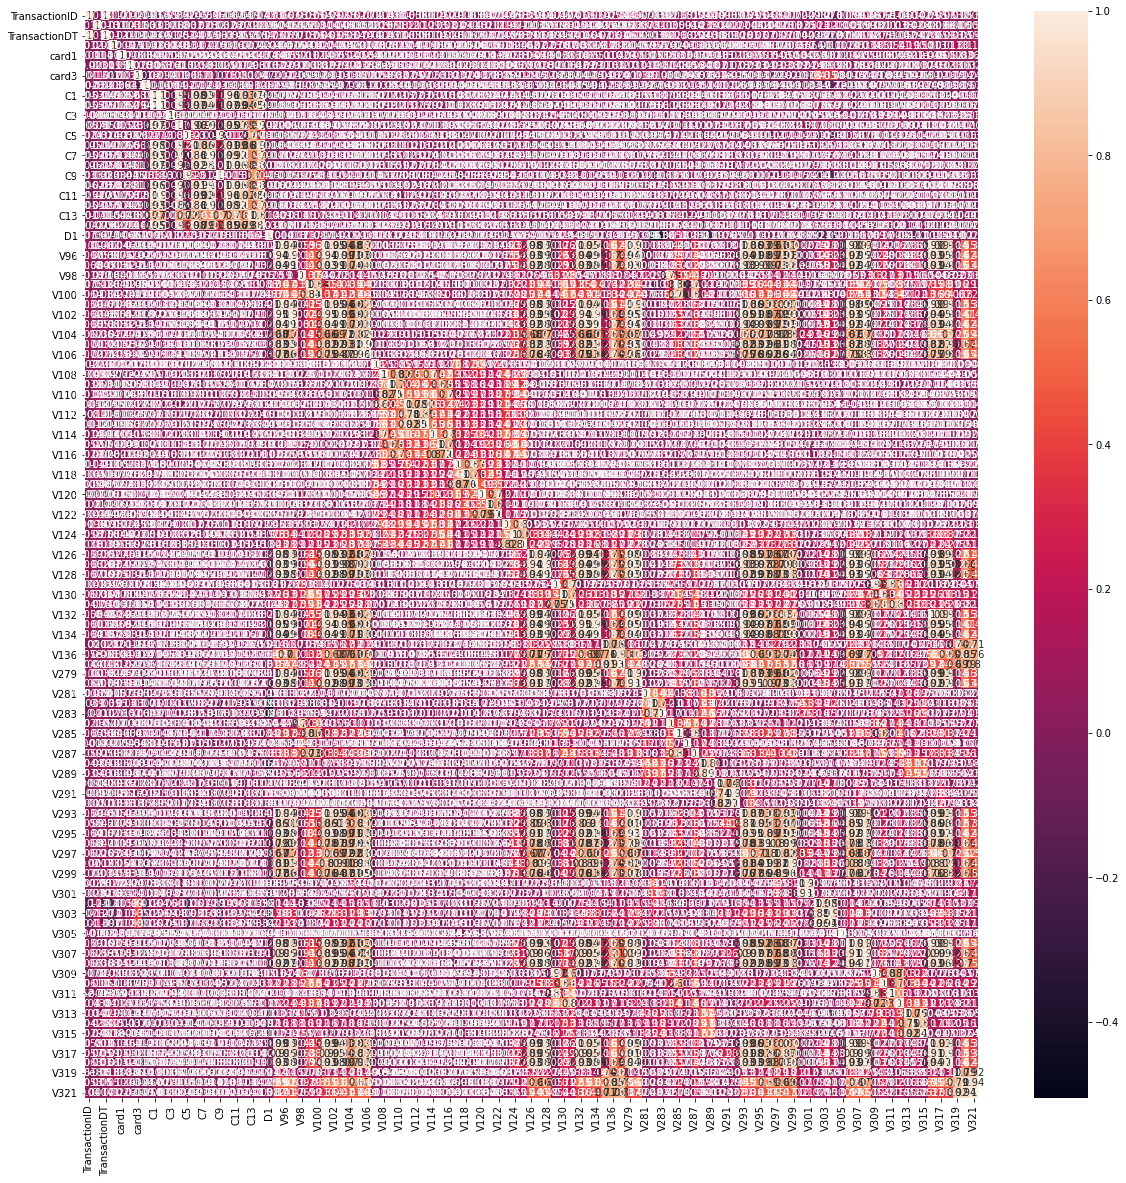

In [194]:
corr = train.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True) 

In [195]:
train = pd.get_dummies(train)
print(train.shape)
train.head()

(590540, 122)


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit
0,2987000,0,86400,68.5,13926,321.0,150.0,142.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.0,1758.0,925.0,0.0,354.0,135.0,50.0,1404.0,790.0,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [196]:
test = pd.get_dummies(test)
print(test.shape)
test.head()

(506691, 120)


,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit
0,3663549,18403224,31.95,10409,111.0,150.0,226.0,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0,0,1
1,3663550,18403263,49.00,4272,111.0,150.0,226.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,0.0,4.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,77.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0,0,1
2,3663551,18403310,171.00,4476,574.0,150.0,226.0,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,968.000000,0.000000,0.000000,705.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,0,0,0,0,1,0,0,0,1,0,0,1
3,3663552,18403310,284.95,10989,360.0,150.0,166.0,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0,0,1
4,3663553,18403317,67.95,18018,452.0,150.0,117.0,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,1


In [197]:
train.drop(['TransactionID'], axis=1, inplace=True)
test_id = test['TransactionID']
test.drop(['TransactionID'], axis=1, inplace=True) 

In [198]:
print(train.shape)
print(test.shape) 

(590540, 121)
(506691, 119)


In [200]:
target = train['isFraud']

In [201]:
train.drop(['isFraud'], axis=1, inplace=True)
print(train.shape)
print(test.shape) 

(590540, 120)
(506691, 119)


## Modelling

In [203]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit, KFold
from sklearn.ensemble import RandomForestClassifier
import time
import xgboost as xgb
import warnings
import pickle

In [204]:
%%time
xgmodel = xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468,
 learning_rate=0.05, max_depth=50,
 min_child_weight=1.7817, n_estimators=200,
 reg_alpha=0.4640, reg_lambda=0.8571,
 subsample=0.5213, random_state =7, nthread = -1)
xgmodel.fit(train, target) 

C:\Users\sadhy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:30:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 20min 51s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=50,
              min_child_weight=1.7817, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, nthread=-1, num_parallel_tree=1,
              random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
              scale_pos_weight=1, subsample=0.5213, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [205]:
y_pred_xg = xgmodel.predict_proba(test)

In [206]:
y_pred_xg

array([[0.9974225 , 0.00257749],
       [0.99698365, 0.00301637],
       [0.9920487 , 0.00795131],
       ...,
       [0.98480034, 0.01519969],
       [0.9898793 , 0.01012067],
       [0.9944317 , 0.00556832]], dtype=float32)

## Generating Submission File

In [207]:
sub = pd.DataFrame()
sub['TransactionID'] = test_id
sub['isFraud'] = y_pred_xg[:, 1]
sub.to_csv('submission_xgb.csv', index=False) 